## Imports

In [1]:
from numpy import load
import numpy as np
import time 
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import scipy.sparse as sp
from sklearn.preprocessing import StandardScaler
from matplotlib.pyplot import figure
from collections import defaultdict
import random

## Load Data

In [2]:
ag2l = load('/Users/krol/Inversion-Detection/Inversion Benchmark Files/ag1000g_2R_gambiae_full.npz')
counts = ag2l['allele_counts']
positions = ag2l['positions']
mask = ag2l['mask']

In [3]:
print("Allele_Counts ", counts, counts.shape)
print("Positions ", positions, positions.shape)
print("Mask ", mask, mask.shape)

Allele_Counts  [[0. 1. 0. ... 2. 0. 1.]
 [1. 0. 0. ... 2. 0. 2.]
 [0. 1. 0. ... 2. 0. 2.]
 ...
 [0. 0. 1. ... 2. 0. 2.]
 [1. 0. 0. ... 2. 0. 2.]
 [1. 0. 0. ... 2. 0. 2.]] (81, 916017)
Positions  [    7075     7376     8046 ... 61460994 61521396 61525410] (916017,)
Mask  [0. 0. 0. ... 0. 0. 0.] (916017,)


In [4]:
def window_(counts, position, mask, windowsize):
    pos_and_cols = defaultdict(list)
    positive = []
    negative = []
    
    #populates the sliding window
    pos_labels = set()
    for idx, p in enumerate(position):
        win_idx = p // windowsize
        pos_and_cols[win_idx].append(counts[:, idx])
        
        # assume inverted if any position is inverted in window
        if mask[idx] == 1.0:
            pos_labels.add(win_idx)
            
    print(list(pos_and_cols.keys()))
        
    
    for win_idx, columns in pos_and_cols.items():
        if win_idx in pos_labels:
            positive.append(np.array(columns).T)
        else:
            negative.append(np.array(columns).T)
       
    return positive, negative

In [5]:
pos, neg = window_(counts, positions, mask, 10000)

print(len(pos), len(neg))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222

774 5084


In [6]:
neg[1].shape

(81, 38)

In [7]:
print(pos[0].shape)

(81, 28)


## Analysis

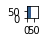

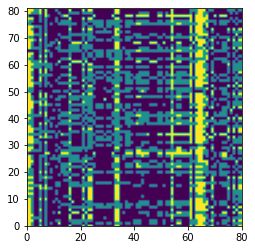

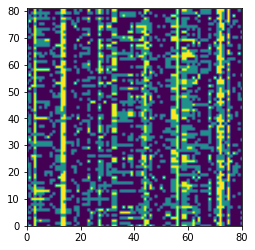

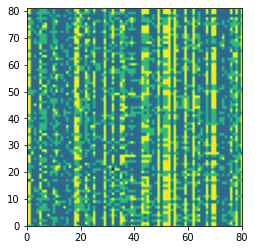

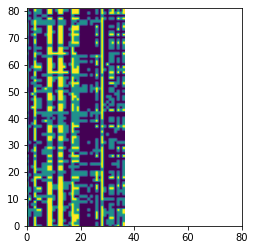

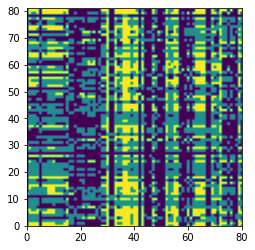

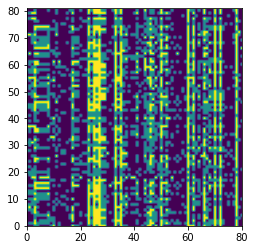

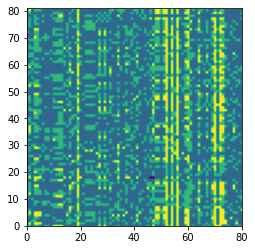

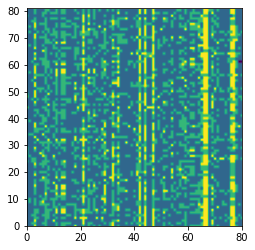

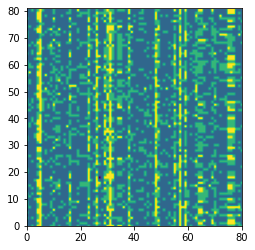

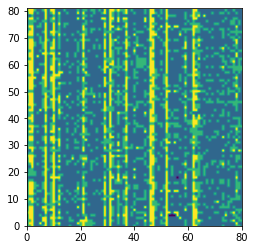

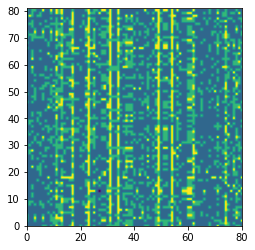

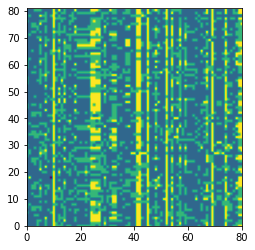

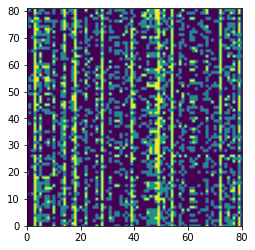

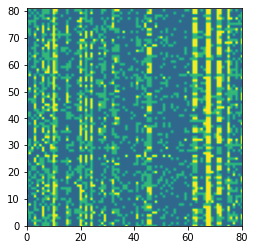

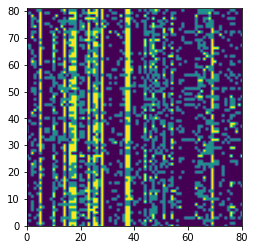

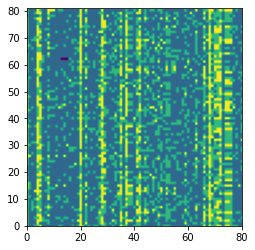

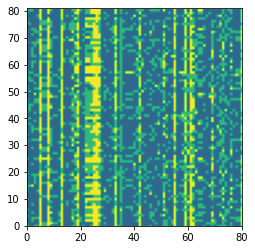

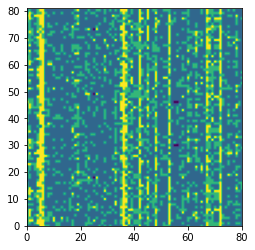

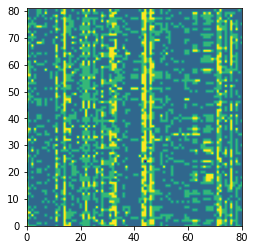

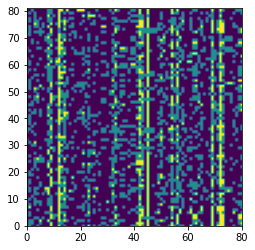

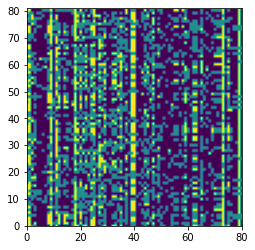

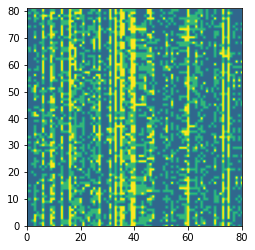

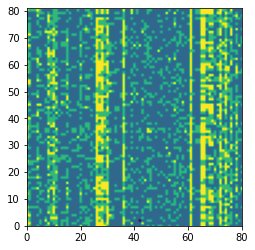

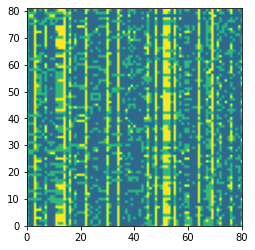

In [8]:
f = plt.figure()
for i in range(0, 25):
    f.add_subplot(1,25, i+1)
    plt.imshow(pos[i])
    plt.ylim(0, 81)
    plt.xlim(0, 80)
    plt.show()

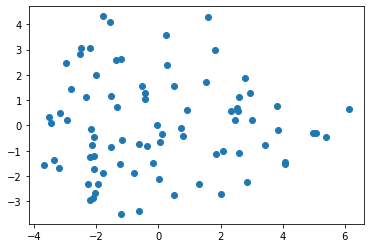

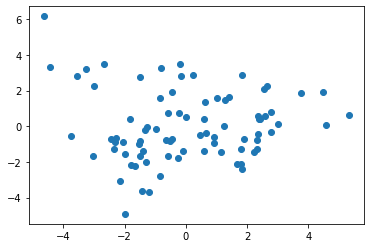

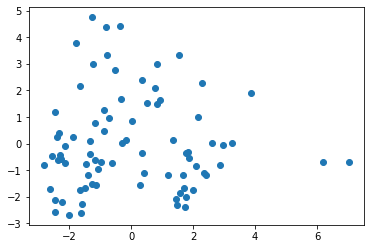

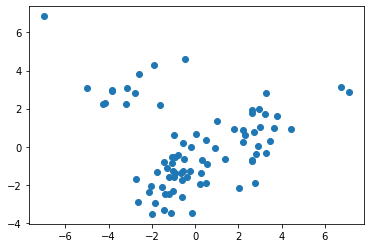

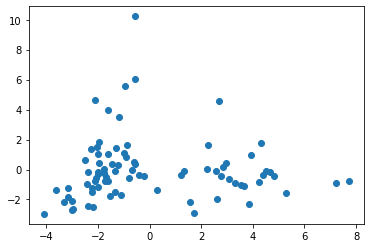

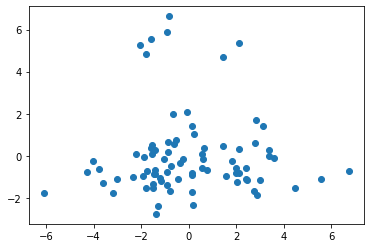

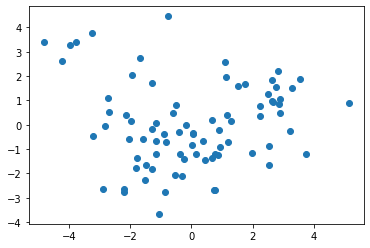

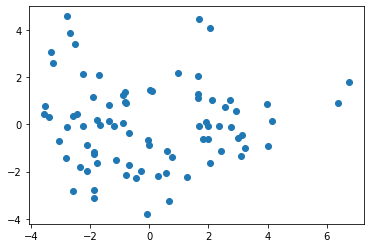

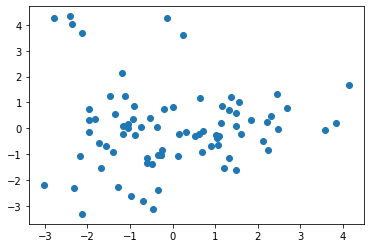

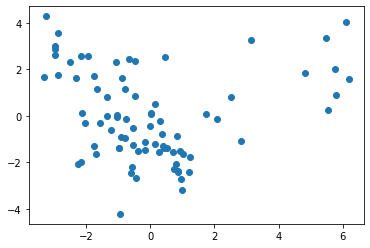

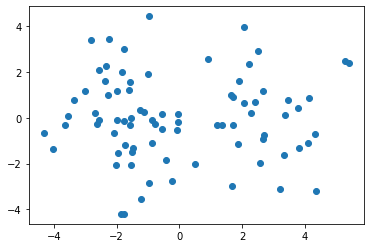

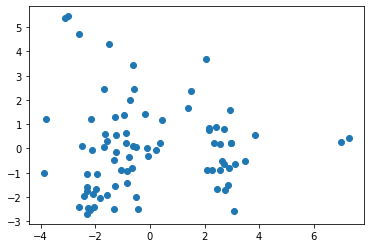

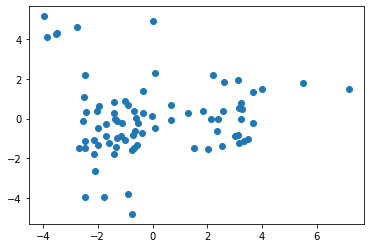

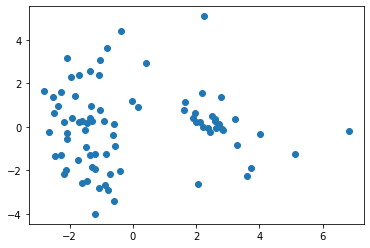

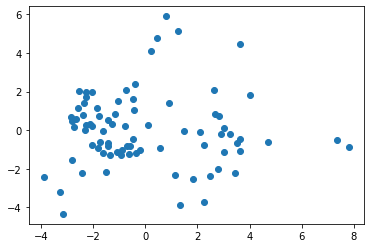

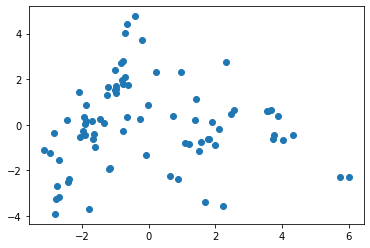

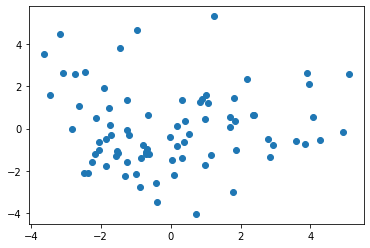

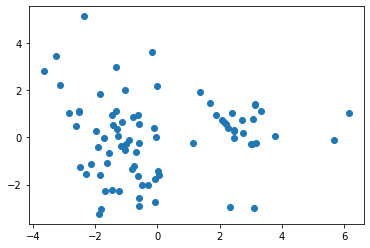

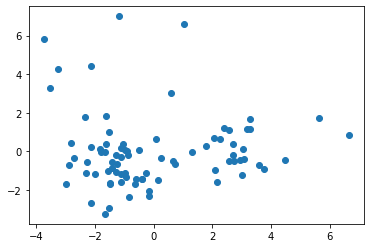

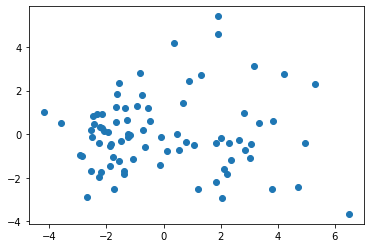

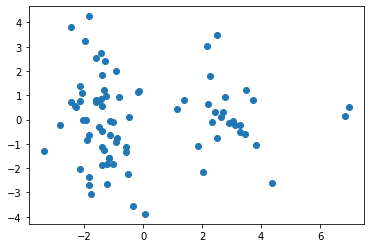

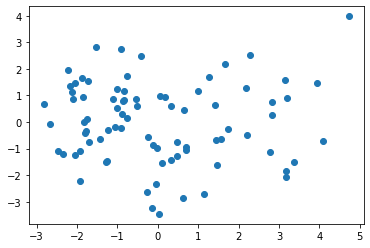

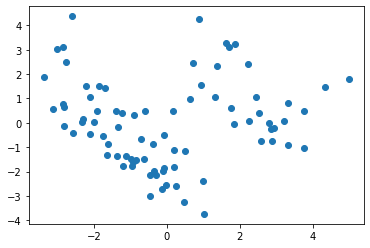

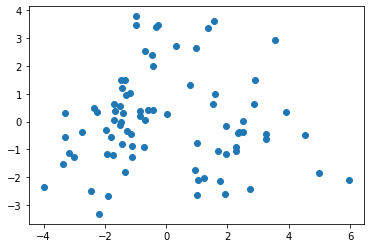

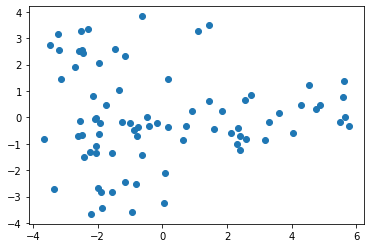

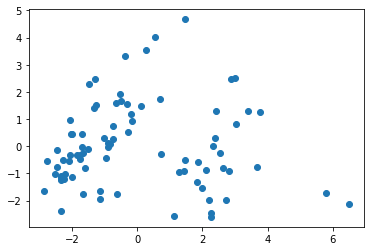

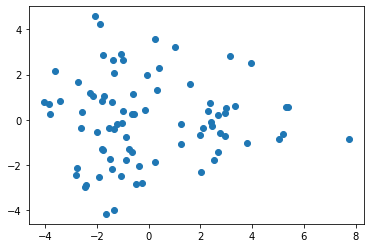

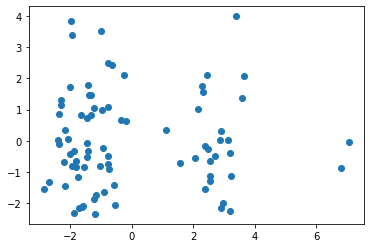

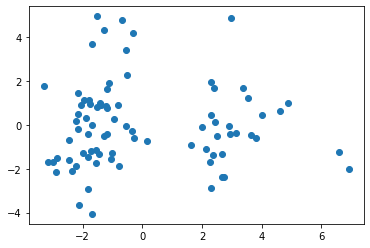

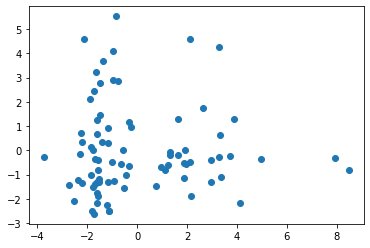

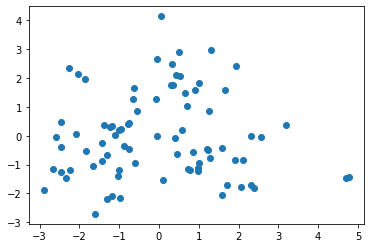

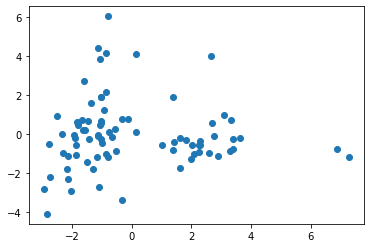

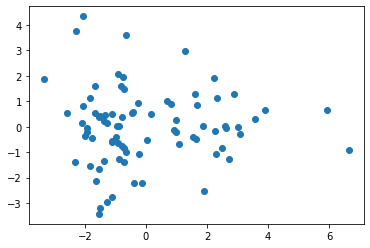

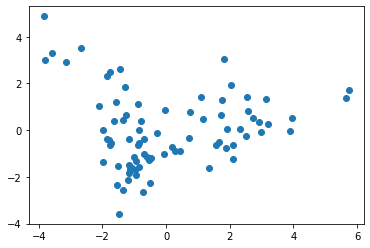

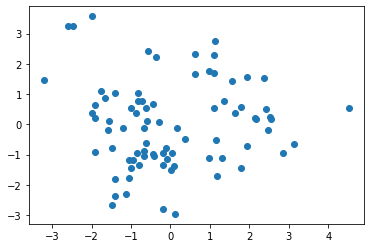

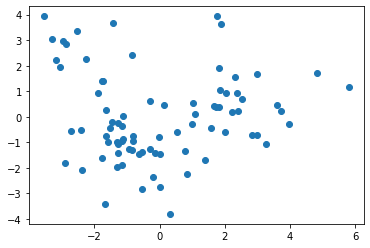

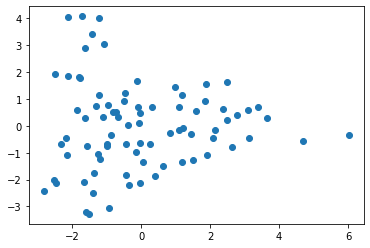

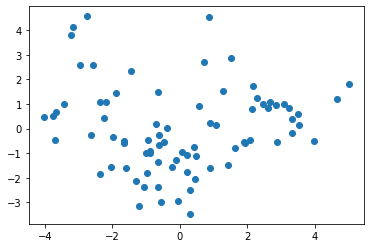

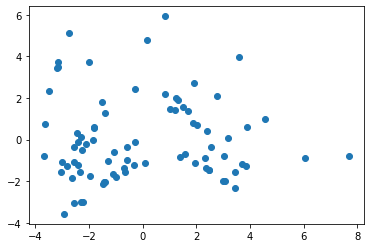

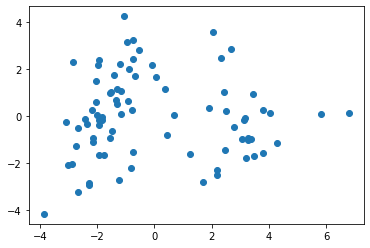

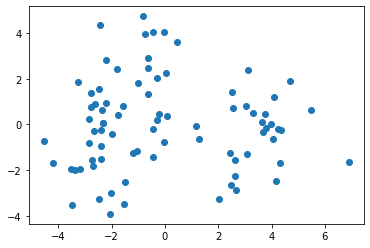

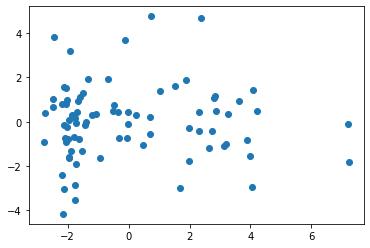

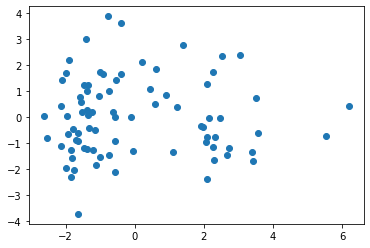

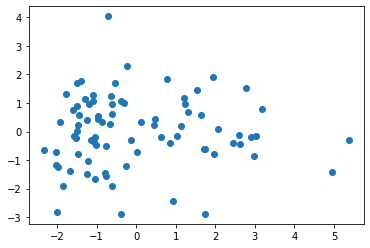

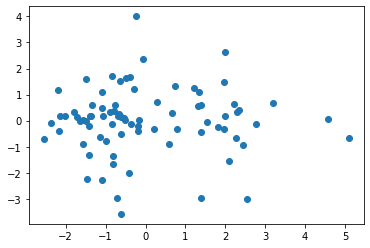

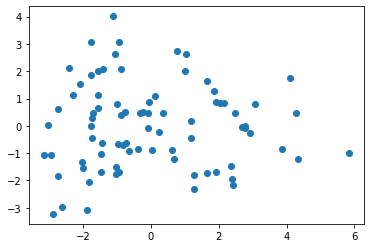

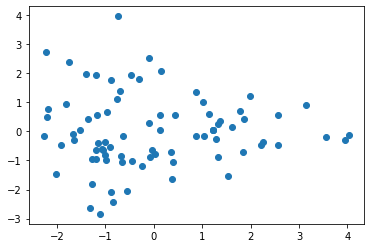

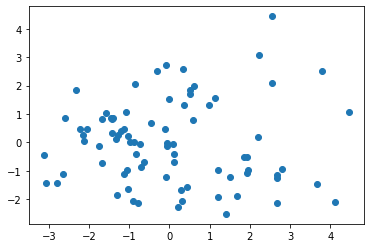

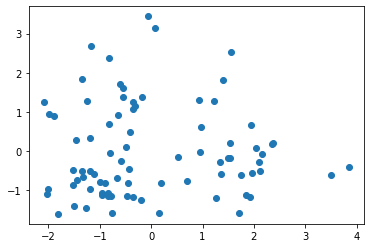

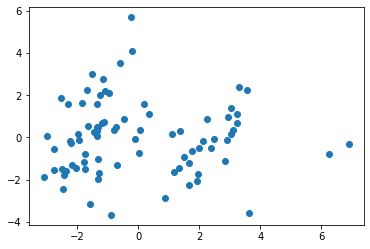

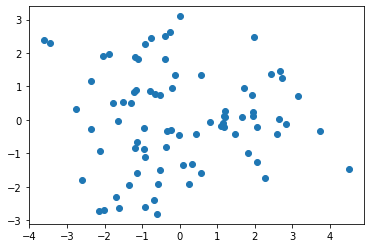

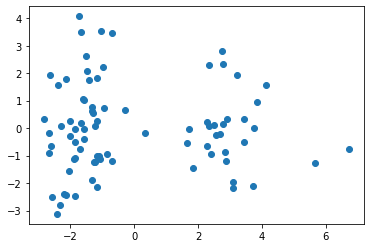

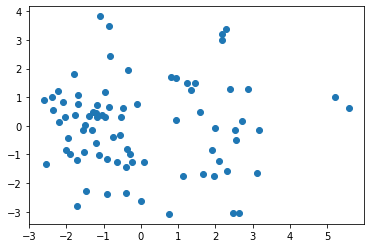

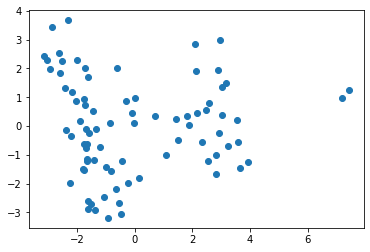

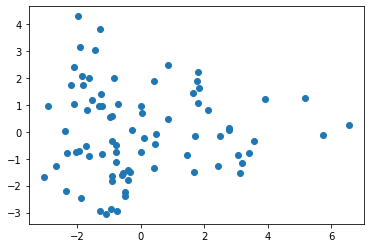

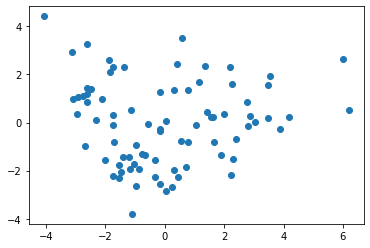

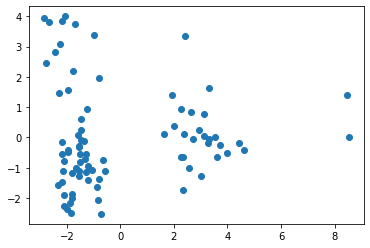

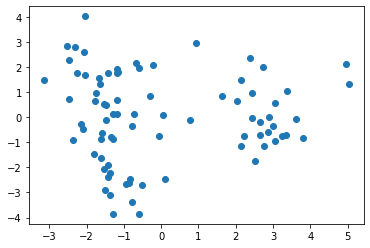

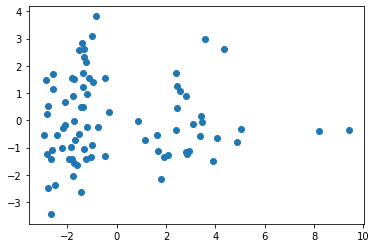

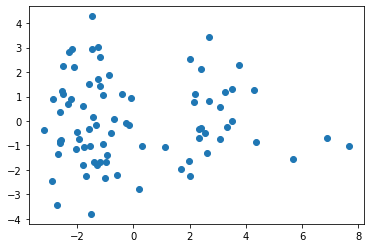

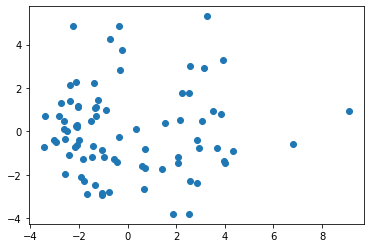

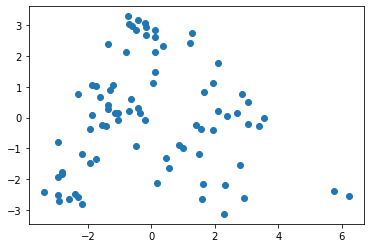

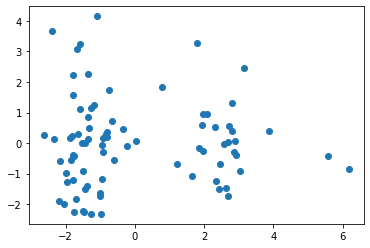

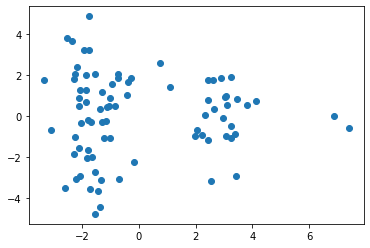

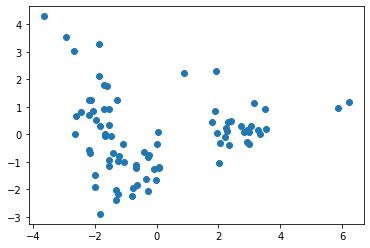

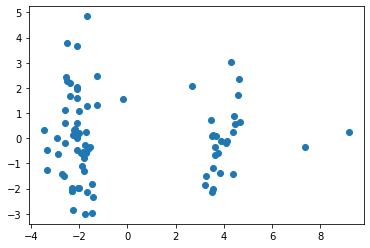

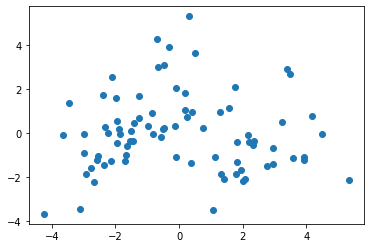

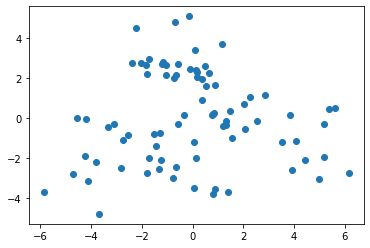

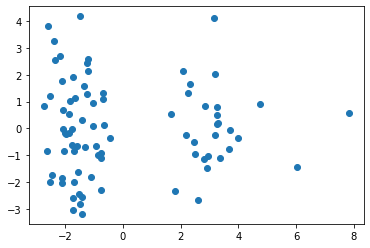

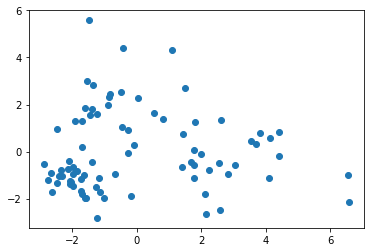

In [9]:
pca = PCA(n_components=2)

for window in pos[10:80]:
    proj = pca.fit_transform(window)
    plt.scatter(proj[:, 0], proj[:, 1])
    plt.show()

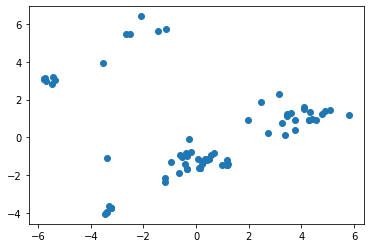

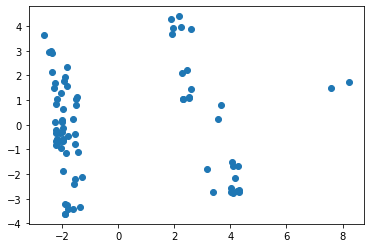

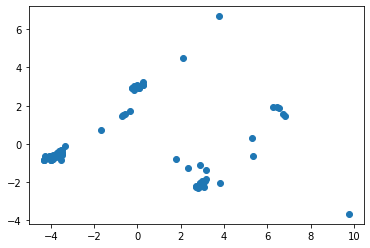

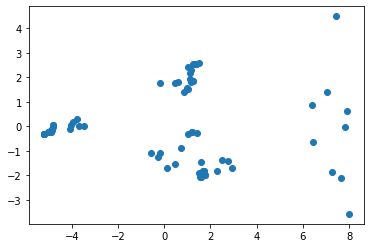

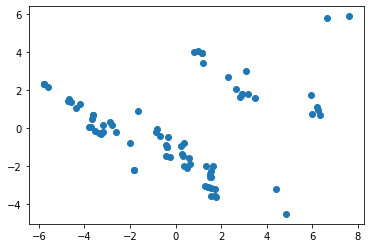

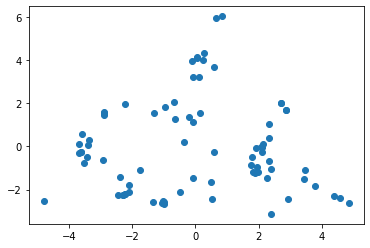

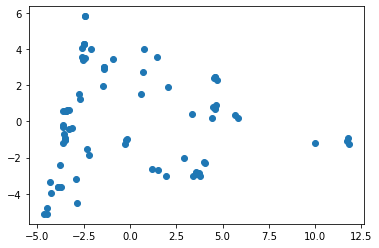

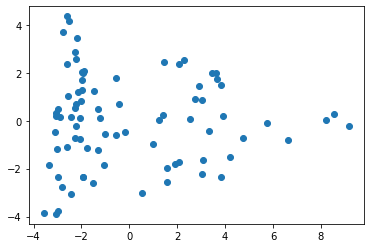

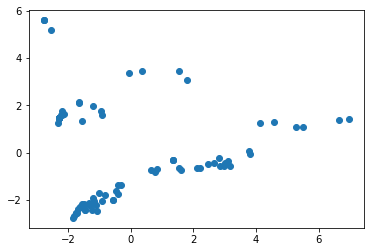

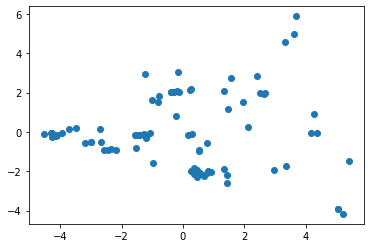

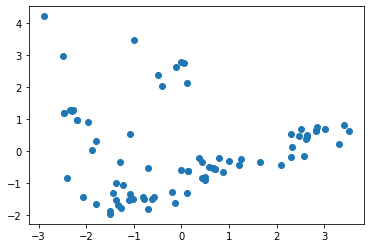

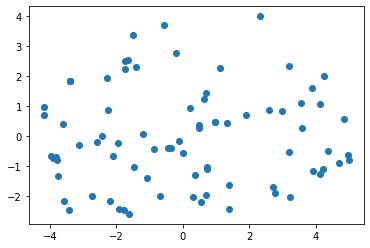

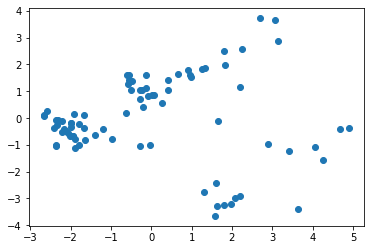

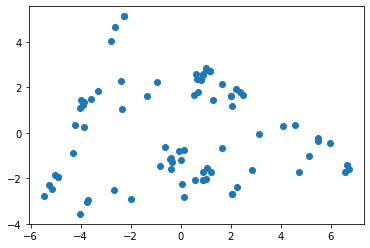

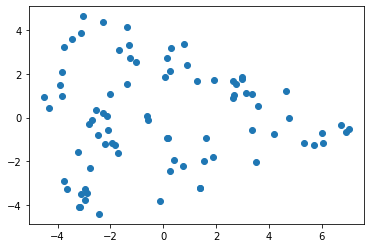

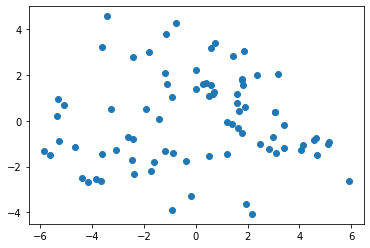

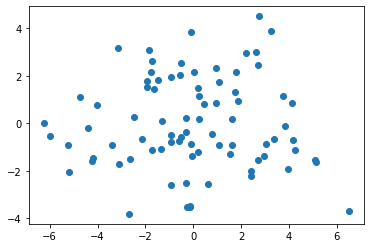

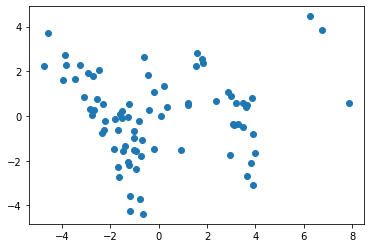

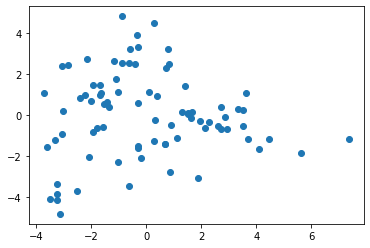

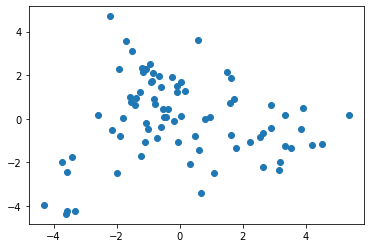

In [10]:
pca = PCA(n_components=2)

for window in neg[10:30]:
    proj = pca.fit_transform(window)
    plt.scatter(proj[:, 0], proj[:, 1])
    plt.show()

## Grab 10 Random Positive Samples

In [11]:
pos_samples = []

In [12]:
for i in range(0, 10):
    pos_samples.append(random.choice(pos))

## Grab 10 Random Negative Samples

In [13]:
neg_samples = []

In [14]:
for i in range(0,10):
    neg_samples.append(random.choice(neg))

# Working with the Work Flow 

### Reading in Pop Files

In [15]:
dir_2R_pop = "/Users/krol/inversion-test-set/inversion_genotypes/ag1000g-2Rb.pops"

In [17]:
c = []
with open(dir_2R_pop, 'r') as my_file:
    content = my_file.read()
    c = content.split()
    print(c)

['Homo_Inv,AB0085-C,AB0103-C,AB0104-C,AB0117-C,AB0119-C,AB0126-C,AB0127-C,AB0128-C,AB0133-C,AB0135-C,AB0136-C,AB0143-C,AB0145-C,AB0146-C,AB0148-C,AB0159-C,AB0160-C,AB0161-C,AB0169-C,AB0172-C,AB0173-C,AB0175-C,AB0176-C,AB0177-C,AB0197-C,AB0201-C,AB0202-C,AB0203-C,AB0205-C,AB0206-C,AB0207-C,AB0208-C,AB0228-C,AB0231-C,AB0233-C,AB0235-C,AB0238-C,AB0239-C,AB0241-C,AB0244-C,AB0251-C,AB0253-C,AB0256-C,AB0261-C,AB0264-C,AB0265-C,AB0268-C,AB0271-C,AB0272-C,AB0273-C,AB0274-C,AB0280-C,AB0283-C,AB0284-C', 'Hetero,AB0129-C,AB0130-C,AB0134-C,AB0147-C,AB0151-C,AB0153-C,AB0155-C,AB0157-C,AB0158-C,AB0166-C,AB0170-C,AB0171-C,AB0174-C,AB0178-C,AB0179-C,AB0198-C,AB0199-C,AB0211-C,AB0217-C,AB0236-C,AB0252-C,AB0260-C,AB0270-C,AB0277-C,AB0278-C', 'Homo_Std,AB0164-C,AB0281-C']


In [19]:
homo_inv = c[0].split(",")
hetero = c[1].split(",")
homo_std = c[2].split(",")

print("Homo_inv: ", homo_inv, "Length", len(homo_inv)-1)
print()
print("hetero: ", hetero, "Length" , len(hetero)-1)
print()
print("homo_std", homo_std, "Length", len(homo_std)-1)

Homo_inv:  ['Homo_Inv', 'AB0085-C', 'AB0103-C', 'AB0104-C', 'AB0117-C', 'AB0119-C', 'AB0126-C', 'AB0127-C', 'AB0128-C', 'AB0133-C', 'AB0135-C', 'AB0136-C', 'AB0143-C', 'AB0145-C', 'AB0146-C', 'AB0148-C', 'AB0159-C', 'AB0160-C', 'AB0161-C', 'AB0169-C', 'AB0172-C', 'AB0173-C', 'AB0175-C', 'AB0176-C', 'AB0177-C', 'AB0197-C', 'AB0201-C', 'AB0202-C', 'AB0203-C', 'AB0205-C', 'AB0206-C', 'AB0207-C', 'AB0208-C', 'AB0228-C', 'AB0231-C', 'AB0233-C', 'AB0235-C', 'AB0238-C', 'AB0239-C', 'AB0241-C', 'AB0244-C', 'AB0251-C', 'AB0253-C', 'AB0256-C', 'AB0261-C', 'AB0264-C', 'AB0265-C', 'AB0268-C', 'AB0271-C', 'AB0272-C', 'AB0273-C', 'AB0274-C', 'AB0280-C', 'AB0283-C', 'AB0284-C'] Length 54

hetero:  ['Hetero', 'AB0129-C', 'AB0130-C', 'AB0134-C', 'AB0147-C', 'AB0151-C', 'AB0153-C', 'AB0155-C', 'AB0157-C', 'AB0158-C', 'AB0166-C', 'AB0170-C', 'AB0171-C', 'AB0174-C', 'AB0178-C', 'AB0179-C', 'AB0198-C', 'AB0199-C', 'AB0211-C', 'AB0217-C', 'AB0236-C', 'AB0252-C', 'AB0260-C', 'AB0270-C', 'AB0277-C', 'AB0278-C

### Working with the Bed file

In [25]:
dir_2R_bed = "/Users/krol/inversion-test-set/inversion_boundaries/ag1000g-2Rb.bed"

In [29]:
content = ""
with open(dir_2R_bed, 'r') as f:
    content = f.read()

In [40]:
c = content.split()
print(c)

print()
start_range = int(c[5])
print(start_range)

print()

end_range = int(c[6])
print(end_range)

['#chrom', 'start', 'end', 'id', '2R', '19023925', '26758676', 'ag1000g-2Rb']

19023925

26758676


In [42]:
print(start_range in positions)
print(end_range in positions)

False
False
